**DATA READ

In [ ]:
import numpy as n
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x=r"C:\Users\zaxak\Desktop\Train.csv"
df = pd.read_csv(x)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**DATA CLEANING

In [3]:
##How many rows and columns and what are their types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
# how many missing/null values per feature??
print(df.isna().sum())
la=df.duplicated().sum()
print(f"{la:.2f} duplicates found")
print('No missing vales found')

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64
0.00 duplicates found
No missing vales found


**Exploratory Data Analysis

<Axes: xlabel='Customer_care_calls', ylabel='Count'>

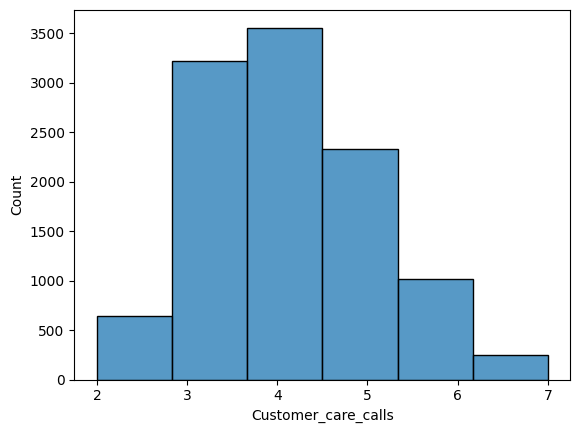

In [6]:
#How many times customer service calls were made by most customers?
sns.histplot(data=df,x='Customer_care_calls',bins=6)

In [7]:
# Counted values per columns
print(df.value_counts('Reached.on.Time_Y.N'))
print(df.value_counts('Product_importance'))
print(df.value_counts('Mode_of_Shipment'))
print(df.value_counts('Customer_rating'))
print(df.value_counts('Customer_care_calls'))

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64
Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64


<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

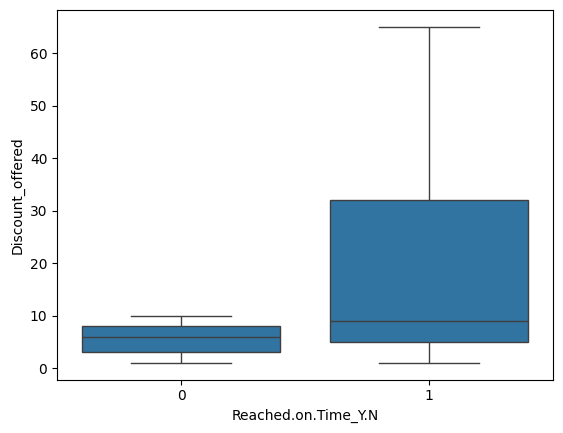

In [8]:
#Discount offered to more late deliveries
sns.boxplot(data=df,x='Reached.on.Time_Y.N', y='Discount_offered')

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

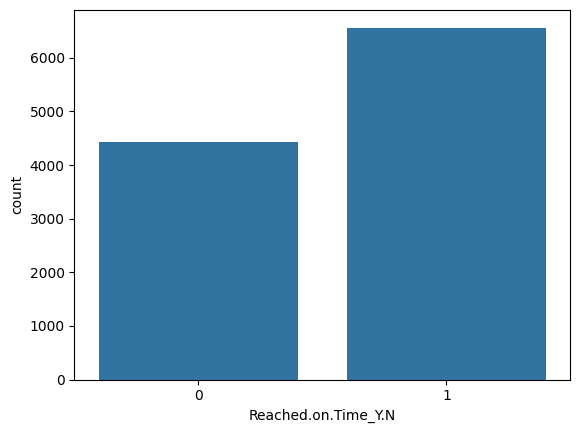

In [9]:
#Orders reached on time: 1=no,2=yes
sns.countplot(data=df,x='Reached.on.Time_Y.N')

Gender
F    5545
M    5454
Name: count, dtype: int64


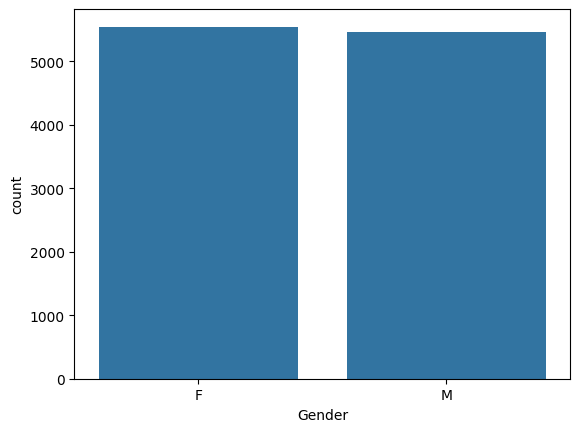

In [10]:
#Customers divided by gender
sns.countplot(data=df,x='Gender')
print(df.value_counts('Gender'))

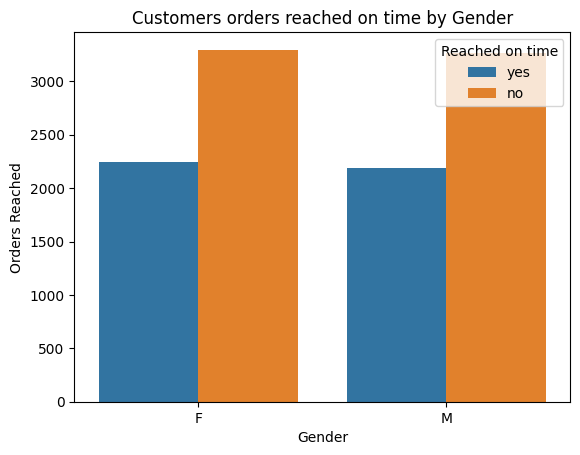

In [11]:
#Customers orders reached on time by gender
sns.countplot(data=df,x='Gender',hue='Reached.on.Time_Y.N',hue_order=[0, 1])
plt.title("Customers orders reached on time by Gender")
plt.xlabel("Gender")
plt.ylabel("Orders Reached")
plt.legend(title='Reached on time',labels=['yes','no'])
plt.show()

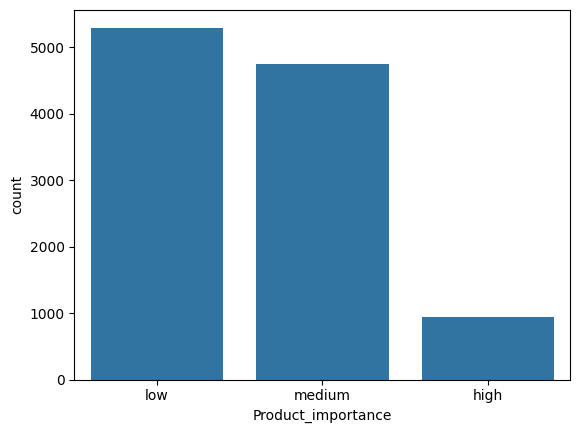

In [12]:
#In which value category products are sold the most?
sns.countplot(data=df,x='Product_importance')
plt.show()

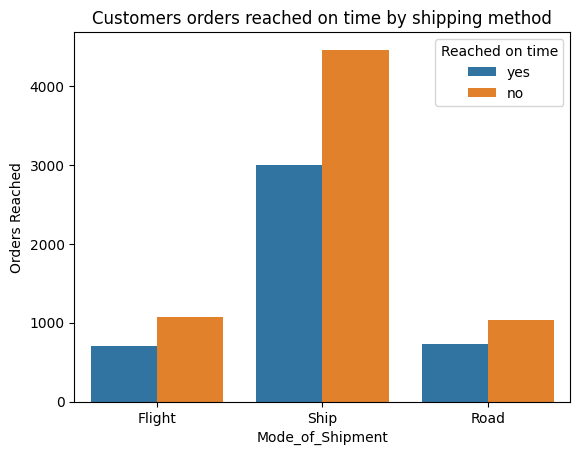

In [13]:
#"Customers orders reached on time or not by shipping method"

sns.countplot(data=df,x='Mode_of_Shipment',hue='Reached.on.Time_Y.N')
plt.title("Customers orders reached on time by shipping method")
plt.ylabel("Orders Reached")
plt.legend(title='Reached on time',labels=['yes','no'])
plt.show()

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

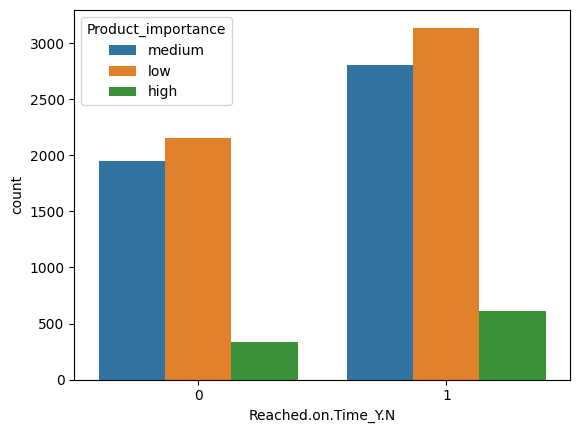

In [14]:
sns.countplot(data=df,x='Reached.on.Time_Y.N',hue='Product_importance')


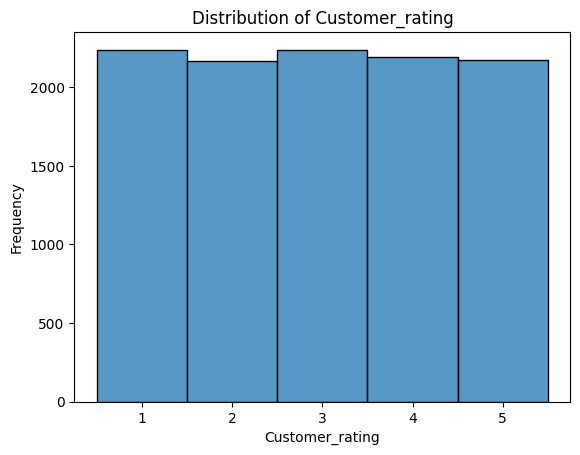

In [15]:
#Distribution of Customer_rating
sns.histplot(df["Customer_rating"], bins=5,discrete=True)
plt.title("Distribution of Customer_rating")
plt.xlabel("Customer_rating")
plt.ylabel("Frequency")
plt.show()


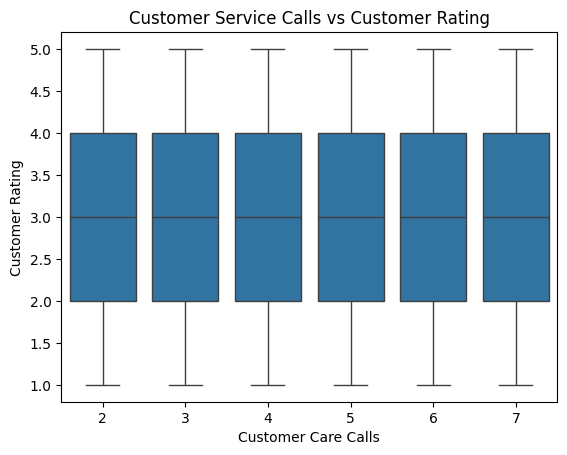

In [16]:
#Does customer service has an influence in customer rating?

sns.boxplot(x="Customer_care_calls", y="Customer_rating", data=df)
plt.title("Customer Service Calls vs Customer Rating")
plt.xlabel("Customer Care Calls")
plt.ylabel("Customer Rating")
plt.show()


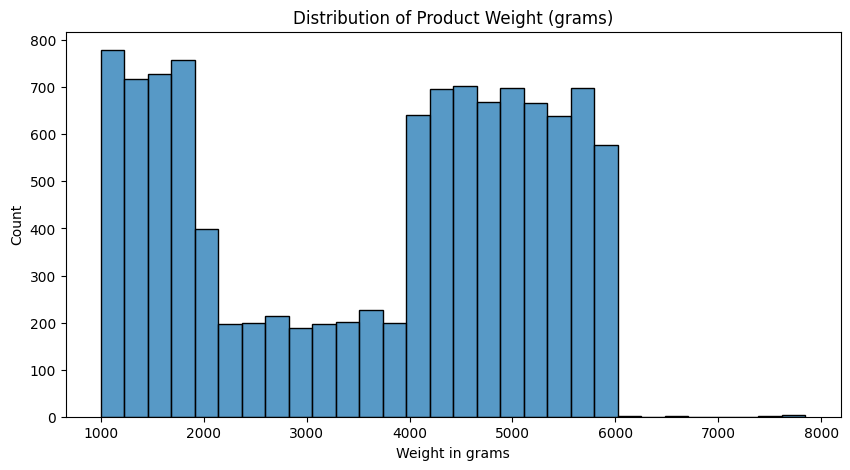

In [18]:
#Distribution of  product weights
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Weight_in_gms", bins=30)
plt.title("Distribution of Product Weight (grams)")
plt.xlabel("Weight in grams")
plt.ylabel("Count")
plt.show()


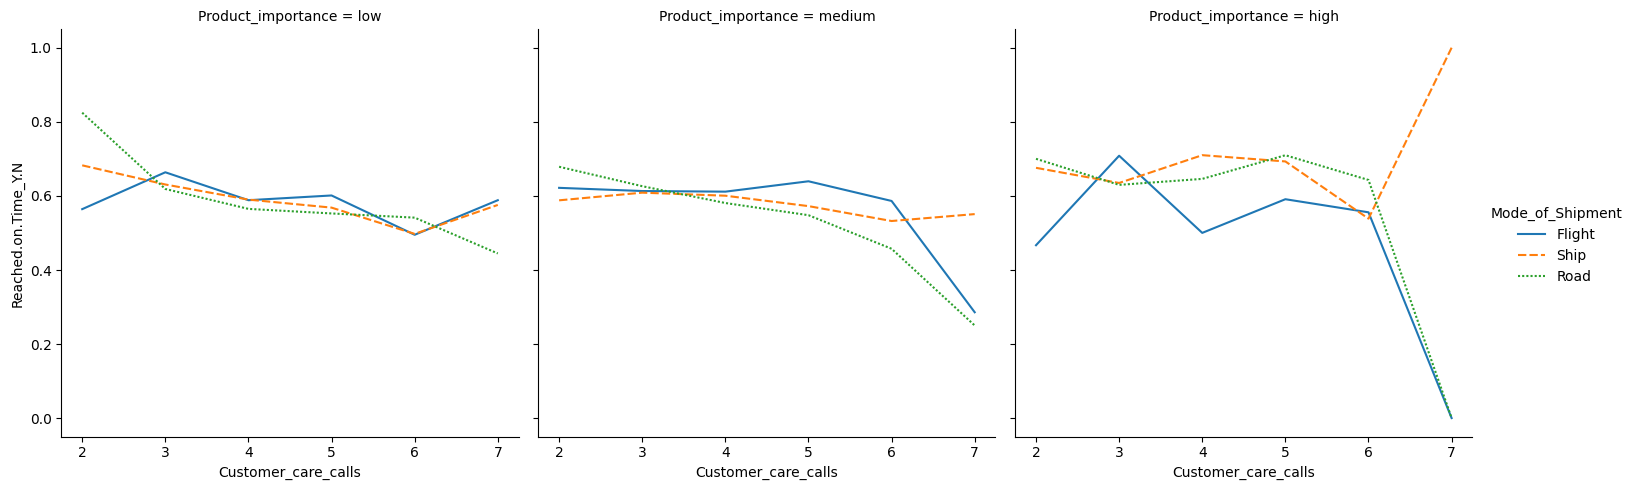

In [19]:

sns.relplot(kind='line',data=df,y='Reached.on.Time_Y.N',x='Customer_care_calls',hue='Mode_of_Shipment',style='Mode_of_Shipment',col='Product_importance',errorbar=None)

In [20]:
#Descriptive statistics
print(
    df[["Mode_of_Shipment", "Reached.on.Time_Y.N", "Cost_of_the_Product",'Customer_care_calls']].groupby("Mode_of_Shipment").agg(["mean", "std"]))


                 Reached.on.Time_Y.N           Cost_of_the_Product             \
                                mean       std                mean        std   
Mode_of_Shipment                                                                
Flight                      0.601576  0.489711          209.306697  48.225095   
Road                        0.588068  0.492323          210.475568  47.600640   
Ship                        0.597561  0.490422          210.343072  48.137240   

                 Customer_care_calls            
                                mean       std  
Mode_of_Shipment                                
Flight                      4.104108  1.130490  
Road                        4.063068  1.117334  
Ship                        4.040606  1.149506  


In [21]:
#Descriptive statistics
print(
    df[["Product_importance", 'Reached.on.Time_Y.N']].groupby("Product_importance").agg(["mean", "std"]))

                   Reached.on.Time_Y.N          
                                  mean       std
Product_importance                              
high                          0.649789  0.477288
low                           0.592788  0.491361
medium                        0.590450  0.491802


In [22]:
print(
    df[["Product_importance", 'Cost_of_the_Product']].groupby("Product_importance").agg(["mean", "std"]))

                   Cost_of_the_Product           
                                  mean        std
Product_importance                               
high                        203.871308  46.698931
low                         212.059845  48.627127
medium                      209.382415  47.576779


In [23]:
print(
    df[["Product_importance", 'Customer_care_calls']].groupby("Product_importance").agg(["mean", "std"]))

                   Customer_care_calls          
                                  mean       std
Product_importance                              
high                          3.872363  1.048736
low                           4.110251  1.174664
medium                        4.028607  1.116985


In [24]:
print(
    df[["Product_importance",'Weight_in_gms']].groupby("Product_importance").agg(["mean", "std"]))
#High importance products weight more

                   Weight_in_gms             
                            mean          std
Product_importance                           
high                 4005.551688  1478.101488
low                  3497.488956  1672.770052
medium               3712.050484  1606.523994


In [ ]:
#What are the columns unique entries?
for col in df.columns:
    if df[col].dtype=='object':
        print(f"{col} has {df[col].unique()} unique values")
    else:
        print(f"{col} has {df[col].nunique()} unique values")

ID has 10999 unique values
Warehouse_block has ['D' 'F' 'A' 'B' 'C'] unique values
Mode_of_Shipment has ['Flight' 'Ship' 'Road'] unique values
Customer_care_calls has 6 unique values
Customer_rating has 5 unique values
Cost_of_the_Product has 215 unique values
Prior_purchases has 8 unique values
Product_importance has ['low' 'medium' 'high'] unique values
Gender has ['F' 'M'] unique values
Discount_offered has 65 unique values
Weight_in_gms has 4034 unique values
Reached.on.Time_Y.N has 2 unique values


In [27]:
#Percentages from each block on time deliveries 
x2=df.loc[df["Warehouse_block"] == "A", "Reached.on.Time_Y.N"].mean() * 100
print(f"{x2:.2f}% of products from 'A' block were not delivered on time.")
x3=df.loc[df["Warehouse_block"] == "B", "Reached.on.Time_Y.N"].mean() * 100
print(f"{x3:.2f}% of products from 'B' block were not delivered on time.")
x4=df.loc[df["Warehouse_block"] == "C", "Reached.on.Time_Y.N"].mean() * 100
print(f"{x4:.2f}% of products from 'C' block were not delivered on time.")
x5=df.loc[df["Warehouse_block"] == "D", "Reached.on.Time_Y.N"].mean() * 100
print(f"{x5:.2f}% of products from 'D' block were not delivered on time.")
x1=df.loc[df["Warehouse_block"] == "F", "Reached.on.Time_Y.N"].mean() * 100
print(f"{x1:.2f}% of products from 'F' block were not delivered on time.")
print('B block seems to have the lowest delivery rate')

58.65% of products from 'A' block were not delivered on time.
60.23% of products from 'B' block were not delivered on time.
59.68% of products from 'C' block were not delivered on time.
59.76% of products from 'D' block were not delivered on time.
59.85% of products from 'F' block were not delivered on time.
B block seems to have the lowest delivery rate


In [28]:
print(
    df[["Warehouse_block", 'Cost_of_the_Product']].groupby("Warehouse_block").agg(["mean", "std"]))
print('Block B has the most expensive products')

                Cost_of_the_Product           
                               mean        std
Warehouse_block                               
A                        208.767594  48.623021
B                        212.159302  46.980005
C                        211.191489  47.421596
D                        210.907852  48.188264
F                        209.077196  48.545561
Block B has the most expensive products


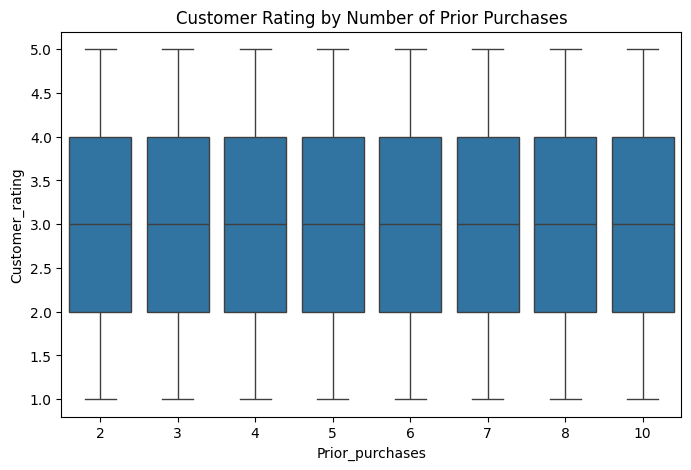

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Prior_purchases', y='Customer_rating', data=df)
plt.title('Customer Rating by Number of Prior Purchases')
plt.show()

